In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
antelope_df = pd.read_csv("mlr01.csv")

In [3]:
antelope_df.head()

,X1,X2,X3,X4
0,2.9,9.2,13.2,2
1,2.4,8.7,11.5,3
2,2.0,7.2,10.8,4
3,2.3,8.5,12.3,2
4,3.2,9.6,12.6,3


In [4]:
x = antelope_df.drop("X1", axis=1)
y = antelope_df["X1"]

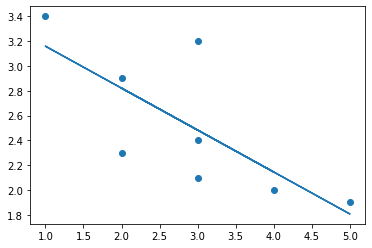

In [5]:
plt.scatter(x['X4'],y)
m,b = np.polyfit(x['X4'],y,deg=1)
plt.plot(x['X4'],m*x['X4']+b)
plt.show()

In [6]:
#Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Feature Scaling

In [7]:
# cor = x_train.corr()
# sns.heatmap(cor, cmap=plt.cm.CMRmap_r, annot=True)
# plt.show()

In [8]:
# with the following function we can  select highly correlated features
# it will remove the first feature that is correlated with anything other feature

# def correlation(datasets,threshold):
#     col_corr = set()   # set name of all the correlated columns
#     corr_matrix = datasets.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i,j]) > threshold: #  we are intrestedin absolute coeff value
#                 colname = corr_matrix.columns[i]   # getting name of column
#                 col_corr.add(colname)
#     return col_corr
    

In [9]:
# corr_feature = correlation(x_train,0.9)
# len(set(corr_feature))

In [10]:
# corr_feature

In [11]:
# x_test.drop(corr_feature,axis=1)
# x_train.drop(corr_feature,axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [13]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [13]:
#Intercept and Coefficientprint("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Coefficients:


[('X1', 1.2303134197482135),
 ('X2', -0.329553668150266),
 ('X3', -1.726822688670937)]

In [14]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))
type(y_train)

Prediction for test set: [2.36320421 2.19911024 3.09793665]


pandas.core.series.Series

In [18]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_train, 'Predicted value': mlr.predict(x_train)})
mlr_diff.head()

,Actual value,Predicted value
7,3,3.264258
2,4,3.886937
4,3,2.923163
3,2,1.845563
6,1,1.080078


In [15]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
1,3,3.178198
5,5,4.109831
0,2,1.534213


In [16]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: -31581.32
Mean Absolute Error: 0.5113845744007198
Mean Square Error: 0.34703750889175033
Root Mean Square Error: 0.5890988956803012


C:\Users\91820\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('mlr02.csv')
X = df.values

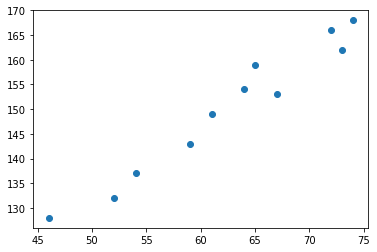

In [29]:
# using age to predict systolic blood pressure
plt.scatter(X[:,1], X[:,0])
plt.show()
# looks pretty linear!


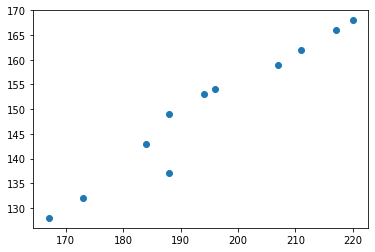

In [30]:
# using weight to predict systolic blood pressure
plt.scatter(X[:,2], X[:,0])
plt.show()
# looks pretty linear!

df['ones'] = 1
Y = df['X1']
X = df[['X2', 'X3', 'ones']]
X2only = df[['X2', 'ones']]
X3only = df[['X3', 'ones']]


In [31]:
def get_r2(X, Y):
    w = np.linalg.solve( X.T.dot(X), X.T.dot(Y) )
    Yhat = X.dot(w)

    # determine how good the model is by computing the r-squared
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

In [32]:
print("r2 for x2 only:", get_r2(X2only, Y))
print("r2 for x3 only:", get_r2(X3only, Y))
print("r2 for both:", get_r2(X, Y))

r2 for x2 only: 0.9578407208147356
r2 for x3 only: 0.9419952085293065
r2 for both: 0.9768471041502091


In [19]:
data = pd.read_csv('mlr03.csv')
data.head()

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [20]:
x = data.drop('FINAL', axis=1)
y = data['FINAL']

In [21]:
#Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [22]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [23]:
#Intercept and Coefficientprint("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Coefficients:


[('EXAM1', 0.27578917563505273),
 ('EXAM2', 0.529003002718804),
 ('EXAM3', 1.271316212493793)]

In [24]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [174.72219769 142.15512642 152.32040905 149.64952073 142.28668027
 165.21222484 151.43251168 184.95190841]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('mlr04.csv')

In [27]:
data.head()

,X1,X2,X3,X4
0,85.099998,8.5,5.100000,4.7
1,106.300003,12.9,5.800000,8.8
2,50.200001,5.2,2.100000,15.1
3,130.600006,10.7,8.399999,12.2
4,54.799999,3.1,2.900000,10.6


In [ ]:
sns.pairplot(data)

In [ ]:
sns.regplot(data=data, x=data['X2'],y=data['X1'])

In [ ]:
sns.regplot(data=data, x=data['X3'],y=data['X1'])

In [ ]:
sns.regplot(data=data, x=data['X4'],y=data['X1'])

In [ ]:
x = data.drop("X1", axis=1)
y = data["X1"]

In [ ]:
#Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

In [ ]:
#Intercept and Coefficientprint("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

In [ ]:
data = pd.read_csv('mlr07.csv')
data.head()

In [ ]:
x = data.drop("X3", axis=1)
y = data["X3"]

In [ ]:
plt.scatter(x['X2'],y)

In [ ]:
#Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

In [ ]:
#Intercept and Coefficientprint("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)